In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df1=pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#we removed the cabin column because most of the values were the niull ones
df1.drop('Cabin',axis=1,inplace=True)

In [8]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

/tmp/ipykernel_18/3169937590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(),inplace=True)


In [10]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
df1['Embarked'].isnull().sum()
df1.dropna(inplace=True)

In [12]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
# we cannot infer anything from the name here as we have the passenger id
df1.drop('Name',axis=1,inplace=True)

In [15]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [16]:
from sklearn.preprocessing import OneHotEncoder
df1['Sex'] = OneHotEncoder(drop='first').fit_transform(df1[['Sex']]).toarray()

In [17]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1.0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,0.0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,0.0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0.0,35.000000,1,0,113803,53.1000,S
4,5,0,3,1.0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.000000,0,0,211536,13.0000,S
887,888,1,1,0.0,19.000000,0,0,112053,30.0000,S
888,889,0,3,0.0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,1.0,26.000000,0,0,111369,30.0000,C


In [18]:
df1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
## label encoding for the Embarked as it contains 3 values
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])

df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0.0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0.0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0.0,35.0,1,0,113803,53.1000,2
4,5,0,3,1.0,35.0,0,0,373450,8.0500,2


In [20]:
df1['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
Name: count, dtype: int64

In [21]:
df_test2=pd.read_csv('/kaggle/input/titanic/test.csv')

In [22]:
df_test2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
df_test2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
df_test2.drop('Cabin',axis=1,inplace=True)

In [25]:
df_test2['Age'].fillna(df_test2['Age'].mean(),inplace=True)

/tmp/ipykernel_18/799046356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test2['Age'].fillna(df_test2['Age'].mean(),inplace=True)


In [26]:
df_test2['Fare'].fillna(df_test2['Fare'].mean(),inplace=True)

/tmp/ipykernel_18/3670221072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test2['Fare'].fillna(df_test2['Fare'].mean(),inplace=True)


In [27]:
df_test2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [28]:
df_test2.drop('Name',axis=1,inplace=True)
df_test2.drop('Ticket',axis=1,inplace=True)


In [29]:
df_test2['Sex'] = OneHotEncoder(drop='first').fit_transform(df_test2[['Sex']]).toarray()

In [30]:
from sklearn.preprocessing import LabelEncoder
## label encoding for the Embarked as it contains 3 values
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
df_test2['Embarked'] = label_encoder.fit_transform(df_test2['Embarked'])

df_test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1.0,34.5,0,0,7.8292,1
1,893,3,0.0,47.0,1,0,7.0000,2
2,894,2,1.0,62.0,0,0,9.6875,1
3,895,3,1.0,27.0,0,0,8.6625,2
4,896,3,0.0,22.0,1,1,12.2875,2


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    float64
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 76.4+ KB


In [32]:
df1.drop('Ticket',axis=1,inplace=True)

In [33]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.000000,1,0,7.2500,2
1,2,1,1,0.0,38.000000,1,0,71.2833,0
2,3,1,3,0.0,26.000000,0,0,7.9250,2
3,4,1,1,0.0,35.000000,1,0,53.1000,2
4,5,0,3,1.0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.000000,0,0,13.0000,2
887,888,1,1,0.0,19.000000,0,0,30.0000,2
888,889,0,3,0.0,29.699118,1,2,23.4500,2
889,890,1,1,1.0,26.000000,0,0,30.0000,0


In [34]:
df1.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030300,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,0.043136,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


<Axes: >

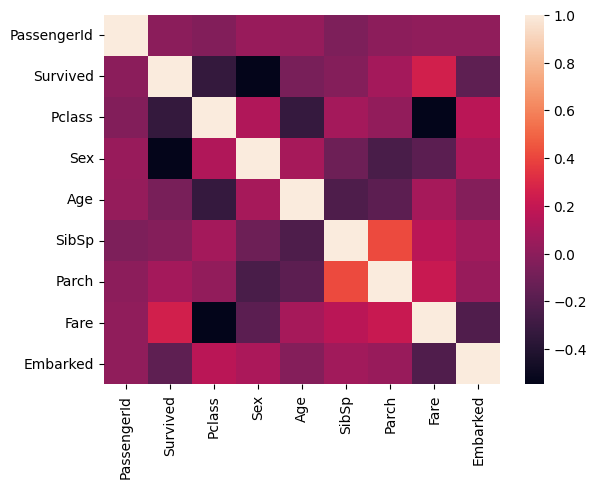

In [35]:
import seaborn as sns
sns.heatmap(df1.corr())

In [36]:
y=df1['Survived']
X=df1.drop('Survived',axis=1)

In [37]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1.0,22.000000,1,0,7.2500,2
1,2,1,0.0,38.000000,1,0,71.2833,0
2,3,3,0.0,26.000000,0,0,7.9250,2
3,4,1,0.0,35.000000,1,0,53.1000,2
4,5,3,1.0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1.0,27.000000,0,0,13.0000,2
887,888,1,0.0,19.000000,0,0,30.0000,2
888,889,3,0.0,29.699118,1,2,23.4500,2
889,890,1,1.0,26.000000,0,0,30.0000,0


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

# **Logistic Regression**

In [40]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
import matplotlib.pyplot as plt

In [42]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0])

In [43]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
711    0
840    0
381    1
141    1
174    0
Name: Survived, Length: 294, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8027210884353742
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       190
           1       0.71      0.75      0.73       104

    accuracy                           0.80       294
   macro avg       0.78      0.79      0.79       294
weighted avg       0.81      0.80      0.80       294

[[158  32]
 [ 26  78]]


# **SVM**

In [46]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred_svm=svc.predict(X_test)

In [47]:
score=accuracy_score(y_pred_svm,y_test)
print(score)
print(classification_report(y_pred_svm,y_test))
print(confusion_matrix(y_pred_svm,y_test))

0.8027210884353742
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       184
           1       0.74      0.74      0.74       110

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294

[[155  29]
 [ 29  81]]


# **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [49]:
score=accuracy_score(y_pred_rf,y_test)
print(score)
print(classification_report(y_pred_rf,y_test))
print(confusion_matrix(y_pred_rf,y_test))

0.8061224489795918
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       193
           1       0.70      0.76      0.73       101

    accuracy                           0.81       294
   macro avg       0.78      0.80      0.79       294
weighted avg       0.81      0.81      0.81       294

[[160  33]
 [ 24  77]]


# **Hyperparameter tuning for logistic Regression**

In [50]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1,0.1,0.01]
solver=['newton-cg','lgbfs','liblinear','sag','saga']

In [51]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [52]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [53]:
## GRID SEARCH CV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [54]:
grid


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lgbfs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [55]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,7,1,1.0,54.000000,0,0,51.8625,2
576,577,2,0.0,34.000000,0,0,13.0000,2
445,446,1,1.0,4.000000,0,2,81.8583,2
74,75,3,1.0,32.000000,0,0,56.4958,2
670,671,2,0.0,40.000000,1,1,39.0000,2
...,...,...,...,...,...,...,...,...
107,108,3,1.0,29.699118,0,0,7.7750,2
271,272,3,1.0,25.000000,0,0,0.0000,2
862,863,1,0.0,48.000000,0,0,25.9292,2
436,437,3,0.0,21.000000,2,2,34.3750,2


In [56]:
df_test2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1.0,34.50000,0,0,7.8292,1
1,893,3,0.0,47.00000,1,0,7.0000,2
2,894,2,1.0,62.00000,0,0,9.6875,1
3,895,3,1.0,27.00000,0,0,8.6625,2
4,896,3,0.0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1.0,30.27259,0,0,8.0500,2
414,1306,1,0.0,39.00000,0,0,108.9000,0
415,1307,3,1.0,38.50000,0,0,7.2500,2
416,1308,3,1.0,30.27259,0,0,8.0500,2


In [57]:
grid.fit(X_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lgbfs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [58]:
grid.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [59]:
grid.best_score_

0.7915966386554621

In [60]:
y_pred_lg_hyp=grid.predict(df_test2)

# **Hyperparameter tuning for random forest**

In [61]:
cv_params = {'n_estimators' : [50,100],
'max_depth' : [10,50],
'min_samples_leaf' : [0.5,1],
'min_samples_split' : [0.001, 0.01],
'max_features' : ["sqrt"],
'max_samples' : [.5,.9]}

In [62]:
rf = RandomForestClassifier(random_state=0)
# Search over specified parameters

rf_val = GridSearchCV(rf, cv_params, cv=cv, refit='f1', n_jobs = -1,verbose = 1)

In [63]:
rf_val.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [64]:
rf_val.best_params_


{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 50}

In [65]:
rf_opt = RandomForestClassifier(n_estimators = 50, max_depth = 10,
min_samples_leaf = 1, min_samples_split = 0.01,
max_features='sqrt', max_samples = 0.9,random_state = 0)

In [66]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.9, min_samples_split=0.01,
                       n_estimators=50, random_state=0)

In [67]:
y_pred_rf_hyp = rf_opt.predict(df_test2)
y_pred_rf_hyp

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission = submission.drop('Survived', axis=1)
submission['Survived'] = y_pred_lg_hyp
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
submission.to_csv('submission.csv', index=False)